# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name : Mingyu Gao
### ID : 5216281

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual)

### 4a. Implementation

In [1]:
from collections import defaultdict
from tqdm import tqdm
from itertools import permutations
import itertools
from nltk import ngrams
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from itertools import permutations
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import time
from random import randint

### get minimum hash matrix

In [2]:
benign_data = pd.read_csv('./dataset/source10_benign.csv', low_memory = False)
botnet_data = pd.read_csv('./dataset/source10_botnet.csv', low_memory = False)
ori_data = pd.read_csv('./dataset/source10_discretize.csv',low_memory = False)

In [3]:
# function for get the 3-gram dictionary according to the source address and destination address
def get_3gram_dict(data):
    '''
    data: input data for get 3-gram
    return: ippair_list - the pair of ip source address and destination address
    ippair_feature: the 3-gram feature
    '''
    index_matrix = data[["SrcAddr", "DstAddr", "feature"]
                        ].groupby(["SrcAddr", "DstAddr"])
    dict_2 = index_matrix.groups
    dict_3 = {}  # dict without values <3 -> for 3-gram
    for k, v in dict_2.items():
        temp = []
        if len(v) >= 3:
            for value in v:
                temp.append(str(int(ori_data.loc[value, ['feature']])))
            dict_3[k] = temp

    # get 3-gram for each ip combination
    n_gram = 3
    dict_4 = {} # key:ip combination value:3-gram features
    for k,v in dict_3.items():
        temp2 = []
        temp3 = []
        if(len(v)>=3):
            for i in range(0, len(v)-n_gram +1):
                temp2.append("".join(v[i:i+n_gram]))
            dict_4[k] = temp2
        else:
            temp3.append("".join(v))
            dict_4[k]= temp3
    # convert the keys-tuple to list for further putting into dataframe
    ippair_tuple = dict_4.keys()
    ippair_feature = {}
    ippair_list = []
    for k,v in dict_4.items():
        ippair_list.append(k[0]+','+k[1])
        ippair_feature[k[0]+','+k[1]] = v
    return ippair_list,ippair_feature

In [4]:
# function for get permutation of feature
def get_permutations(input_string, repeat_times):
    '''
    input string: the string for permutation
    repeat times: the length of n-gram
    '''
    feature_permutation = []
    for i in itertools.product(input_string, repeat = repeat_times):
        feature_permutation.append((''.join(i)))
    return feature_permutation
res = get_permutations('012',3)
print(res)

['000', '001', '002', '010', '011', '012', '020', '021', '022', '100', '101', '102', '110', '111', '112', '120', '121', '122', '200', '201', '202', '210', '211', '212', '220', '221', '222']


In [5]:
# the function for convert the ippair-3gram-feature to minhash matrix
def get_minhash(data):
    permutations = get_permutations('012',3)
    ippair_list, ippair_feature = get_3gram_dict(data)
    df_minhash = pd.DataFrame(columns=permutations,index=ippair_list)
    for k in ippair_feature.keys():
        for value in ippair_feature[k]:
            if value in df_minhash.columns:
                df_minhash.loc[k,value] = 1
    df_minhash = df_minhash.fillna(0)
    # save the ippair minhash matrix to save running time
    df_minhash.to_csv('./dataset/ippair_minhash_matrix.csv')
    print(df_minhash)
    return df_minhash

In [6]:
# getting minhash matrix takes about 2 minutes, you can load data from the ippair_minhash_matrix.csv
get_minhash(ori_data)

                            000  001  002  010  011  012  020  021  022  100  \
147.32.1.20,147.32.85.7       1    0    0    0    0    0    0    0    0    0   
147.32.1.20,147.32.86.168     1    0    0    0    0    0    0    0    0    0   
147.32.80.9,147.32.84.118     1    0    0    0    0    0    0    0    0    0   
147.32.80.9,147.32.84.137     1    0    0    0    0    0    0    0    0    0   
147.32.80.9,147.32.84.138     1    0    0    0    0    0    0    0    0    0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
147.32.87.36,147.32.86.77     1    0    0    0    0    0    0    0    0    0   
147.32.87.36,147.32.87.1      0    0    0    0    0    0    0    0    0    0   
147.32.87.36,147.32.87.33     0    0    0    0    0    0    0    0    0    0   
147.32.87.36,66.249.66.211    0    0    0    0    0    0    0    1    0    0   
147.32.87.36,66.249.72.228    0    0    0    0    0    0    0    0    0    0   

                            ...  122  2

,000,001,002,010,011,012,020,021,022,100,...,122,200,201,202,210,211,212,220,221,222
"147.32.1.20,147.32.85.7",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.1.20,147.32.86.168",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.80.9,147.32.84.118",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.80.9,147.32.84.137",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.80.9,147.32.84.138",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"147.32.87.36,147.32.86.77",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.87.36,147.32.87.1",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"147.32.87.36,147.32.87.33",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"147.32.87.36,66.249.66.211",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


### transpose matrix

In [7]:
minhash_matrix = pd.read_csv('./dataset/ippair_minhash_matrix.csv')
minhash_matrix.head()

,Unnamed: 0,000,001,002,010,011,012,020,021,022,...,122,200,201,202,210,211,212,220,221,222
0,"147.32.1.20,147.32.85.7",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"147.32.1.20,147.32.86.168",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"147.32.80.9,147.32.84.118",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"147.32.80.9,147.32.84.137",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"147.32.80.9,147.32.84.138",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# transpose matrix
# row: 27 combinations for feature
# coloum: the ippair address
minhash_T = minhash_matrix.T
minhash_T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
Unnamed: 0,"147.32.1.20,147.32.85.7","147.32.1.20,147.32.86.168","147.32.80.9,147.32.84.118","147.32.80.9,147.32.84.137","147.32.80.9,147.32.84.138","147.32.80.9,147.32.84.184","147.32.80.9,147.32.84.25","147.32.80.9,147.32.84.59","147.32.80.9,147.32.84.68","147.32.80.9,147.32.84.94",...,"147.32.87.11,147.32.87.1","147.32.87.212,82.208.56.89","147.32.87.36,147.32.80.13","147.32.87.36,147.32.80.9","147.32.87.36,147.32.86.6","147.32.87.36,147.32.86.77","147.32.87.36,147.32.87.1","147.32.87.36,147.32.87.33","147.32.87.36,66.249.66.211","147.32.87.36,66.249.72.228"
000,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### calculate the jaccard similarity on min hash matrix

In [9]:
# the function for calculate jaccard distance
def jaccard_sim(perm, profile):
    '''
    perm: the permutation for calculating jaccard distance
    profile: the input matrix for calculating
    '''
    jacc = []
    for p in tqdm(perm):
        p1 = np.asarray(profile[:, p[0]], np.bool)
        p2 = np.asarray(profile[:, p[1]], np.bool)
        j = np.double(np.bitwise_and(p1, p2).sum()) / np.double(np.bitwise_or(p1, p2).sum())
        jacc.append(j)
    return np.array(jacc)

In [10]:
# convert the minhash matrix to the numpy
minhash_T_numpy = minhash_T.to_numpy()
# generate the permutaion for calculating jaccard distances
perm = list(permutations([i for i in range(minhash_T_numpy.shape[1])], 2))
# calculate jaccard distance of original minhash
starttime = time.time()
jacc = jaccard_sim(perm, minhash_T_numpy)
endtime = time.time()
# get the cost time of calculating jaccard distance
costtime_ori = endtime-starttime
print("The time of calculating jaccard distance on min-hash matrix is:")
print(costtime_ori)

100%|█████████████████████████████████████████████████████████████████████████| 91506/91506 [00:01<00:00, 86163.63it/s]

The time of calculating jaccard distance on min-hash matrix is:
1.074998378753662


### hash signature

In [11]:
# universal hash function
class UniversalHashing:
    def __init__(self, N, p = 13):
        self.N = N
        self.p = p

    def draw(self):
        a = randint(1, self.p - 1)
        b = randint(0, self.p - 1)
        return lambda x: ((a * x + b) % self.p) % self.N

In [12]:
# LSH hash function based on universal function
def compute_minwise_lsh(profile, bins):
    '''
    profile: input matrix
    bins: the number of hash functions
    '''
    num_hash_fns = 10
    H = UniversalHashing(bins,17)
    hash_fns = []
    for i in range(num_hash_fns):
        hash_fns.append(H.draw())
    h = defaultdict(dict)
    M = np.full([num_hash_fns, profile.shape[1]], np.inf)
    for r in range(profile.shape[0]):
        # compute hash values
        for i, h_i in enumerate(hash_fns):
            # compute h_i(profile[r])
            h[i][r] = h_i(r)
        for c in range(profile.shape[1]):
            if profile[r, c] == 1:
                for i in range(num_hash_fns):
                    if h[i][r] < M[i, c]:
                        M[i, c] = h[i][r]
    return M

In [13]:
def signature_sim(perm, M):
    sig_sim = []
    for p in tqdm(perm):
        p1 = M[:, p[0]]
        p2 = M[:, p[1]]

        tot = M.shape[0]
        sim = (p1 == p2).sum()
        sig_sim.append(sim/tot)
    return sig_sim

In [14]:
bins = np.arange(2, 20, 2)
sig_sims = []
time_sig = []
for b in bins:
    M = compute_minwise_lsh(minhash_T_numpy, b)
    starttime_sig = time.time()
    sig_sim = np.array(signature_sim(perm, M))
    endtime_sig = time.time()
    costtime_sig = endtime_sig - starttime_sig
    time_sig.append(costtime_sig)
    sig_sims.append(sig_sim)
print(mean(time_sig))

100%|████████████████████████████████████████████████████████████████████████| 91506/91506 [00:00<00:00, 189061.90it/s]

0.5020464526282417


### compare time

In [15]:
# time difference
print("The difference of time cost is: " + str((costtime_ori)-mean(time_sig)))
print("The cost time improve is: " + str(format((costtime_ori-mean(time_sig))/costtime_ori,'.00%')))

The difference of time cost is: 0.5729519261254205
The cost time improve is: 53%


### compute error of estimation

In [16]:
import math
errors = []
for sig_sim in sig_sims:
    error = [math.sqrt((s - j)**2) for s, j in zip(sig_sim, jacc)]
    errors.append(sum(error)/len(error))

The best bin is: 6


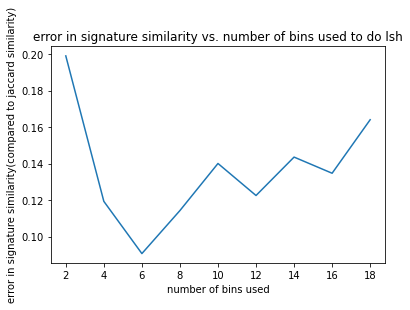

In [17]:
plt.plot(figsize = (21,9))
plt.plot(bins, errors)
plt.title("error in signature similarity vs. number of bins used to do lsh")
plt.xlabel("number of bins used")
plt.ylabel("error in signature similarity(compared to jaccard similarity)")
print("The best bin is: " + str(bins[errors.index(min(errors))]))

### 4b. Analysis and answers to the questions

We implement the Min-wise LSH task on all data including botnet and benign cases after the discretization on dataset 10.

The implementation of Min-wise LSH task can be divided into the following steps. First, the minhash matrix is created where the rows represent the pairs of source and destination addresses and the columns are the 3-gram-permutations of features. The feature is a combination of protocol and duration after the first discretization task. The cell value is set to 1 if the 3-gram exists once in the stream data of the ip-addresses pairs. Second, we transpose the minhash matrix for further hash signature. Third, we design a function to calculate the jaccard distance. We run the jaccard distance calculation for minhash matrix to prepare for the comparison. Fourth, we set different bins to obtain hash signature from 2 to 20 with a stepsize of 2. In this step, we also get the jaccard distance and computation time for each bin. Last, we compare the runtime and estimate error for the LSH algorithm.

The time-comparison result shows that the hash signature generated by LSH algorithm improves the speed of calculate jaccard distance by approximately 2 times. This is a great performance increase, especially if you are dealing with much more data. 

The sub task error estimation plots the error rate compared with original minhash matrix with different numbers of bins(hash functions). Although the error rate varies a lot in each run, the average error rate is lower than 0.1, which proves the guarantee of precision of LSH algorithm. 